## Project 4:  Solving N-Queens Problem using Genetic Algorithms

#### CSC 180  Intelligent Systems

#### Dr. Haiquan Chen, California State University, Sacramento


In [ ]:
# Insert your name, your id, course title, assignment id, and due date here as comment 
'''
CSC 180

Santiago Bermudez, ID: 301118090
Amad Shah, ID: 301753101
Eric Truong, ID: 219318451

Project 3

Due: 11/18/22
'''


## Part I: Position-index-based board representation

In [ ]:
!pip install deap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 139 kB 4.8 MB/s 


In [ ]:
import random
import numpy as np
from deap import algorithms, base, creator, tools

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [ ]:
def create_individual():
    return random.sample(range(64), 8)

In [ ]:
print(create_individual())

[12, 28, 38, 41, 1, 61, 24, 14]


In [ ]:
def show_grid(board):
    
    n = [0]*64
    for i in board:
        n[i] = 1

    for i in range(8):
        for j in range(64):
            if j // 8 == i:
                if n[j] == 1:
                    print('X',end="|")
                else:
                    print('-',end="|")
        print()
        print("----------------")

In [ ]:
toolbox = base.Toolbox()

toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)

toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [ ]:
pop = toolbox.population(n=5)

print(pop[0])

[61, 12, 47, 21, 38, 63, 57, 11]


In [ ]:
show_grid(pop[0])

-|-|-|-|-|-|-|-|
----------------
-|-|-|X|X|-|-|-|
----------------
-|-|-|-|-|X|-|-|
----------------
-|-|-|-|-|-|-|-|
----------------
-|-|-|-|-|-|X|-|
----------------
-|-|-|-|-|-|-|X|
----------------
-|-|-|-|-|-|-|-|
----------------
-|X|-|-|-|X|-|X|
----------------


### 10 pts:  Write your code in the cell below to define the "evaFitness" function, which returns the fitness of any given board.  

- Noticed that in this case, mutation may generate invalid board, e.g., the board with dupliciate positions.  Think about   [5, 32, 8, 8, 41, 3, 55, 49]

- How to exclude those invalid boards from each generation? One way is to add some penalty to the fitness value of invalid boards.  In that case, any invalid board will have a very high fitness value (remember that our goal is to find the board with least fitness value).    To do that, let's write a function ***checkDuplicate()*** to calculate the number of queen pairs in the same position for any given board.   ***Give each duplicate a high penalty (i.e., multiply by 20, 50) and add the penalty to the fitness value.*** 

-  evaFitness() returns the total number of duplicate position pair (with penalty) plus the total number of distinct pairs of queens that attack each other.  

In [ ]:
#fitness function
def evaFitness(individual):  
    conflict = 0
    for i in range(len(individual)):
        iVal = individual[i]

        for jVal in individual[i + 1:]:
            if((iVal % 8) == (jVal % 8)):
                conflict += 1
            elif((iVal - (iVal % 8)) == (jVal - (jVal % 8))):
                conflict += 1
            else:
                dist = abs(jVal - iVal)
                vOffset = (jVal % 8) if (jVal >= iVal) else (iVal % 8)
                vDist = (dist - vOffset)//8 + 1
                hDist = abs((jVal % 8) - (iVal % 8))
    
                if(hDist == vDist):
                    conflict += 1
    
    return [(checkDuplicate(individual)*20 + conflict)]
    
# Calculate the number of queen pairs in the same position for any given board
def checkDuplicate(individual):
    dup = 0
    for i in range(len(individual)):
        for j in individual[i + 1:]:
            if(individual[i] == j):
                dup += 1
                break
    
    return dup
    
print("Checking for duplicates: ", checkDuplicate([5, 32, 8, 8, 41, 3, 55, 49]))
print("Checking for conflicts: ", evaFitness([5, 32, 8, 8, 41, 3, 55, 49]))

Checking for duplicates:  1
Checking for conflicts:  [26]


### 5 pts:  Writer your code in the cell below to register "evaluate" function to toolbox

In [ ]:
toolbox.register("evaluate", evaFitness)

In [ ]:
toolbox.register("mate", tools.cxTwoPoint)

toolbox.register("mutate", tools.mutUniformInt, low = 0, up = 63, indpb=0.1)

toolbox.register("select", tools.selTournament, tournsize=3)

In [ ]:
stats = tools.Statistics(key=lambda ind: ind.fitness.values)

In [ ]:
stats.register("avg", np.mean)
stats.register("min", np.min)

### 10 pts:  Write your code in the cell below to create the first generation, the hall of fame, and launch the genetic algorithm: eaSimple().   How many individuals you want to have for each generation and how many generations you want GA to go thourgh for each run?     Vary those two parameters to see the change. 

In [ ]:
def GenAlg(x, ngen):
    print("Genetic Algorithm model with population size of ", x, " and generation size of ", ngen)
    pop = toolbox.population(x)
    hof = tools.HallOfFame(maxsize = 1)
    pop, log = algorithms.eaSimple(pop, toolbox, cxpb = 0.7, mutpb = 0.2, ngen=ngen, stats=stats, halloffame=hof, verbose=True)
    return pop, log

xList = [500, 100, 2000]
nGenList = [10, 50, 100]

results = []
for x in xList:
    for ngen in nGenList:
        pop, log = GenAlg(x, ngen)
        results.append([pop, log, x, ngen])

Genetic Algorithm model with population size of  500  and generation size of  10
gen	nevals	avg  	min
0  	500   	10.08	4  
1  	385   	11.988	4  
2  	396   	11.568	4  
3  	384   	10.898	3  
4  	377   	10.334	2  
5  	384   	10.298	3  
6  	361   	9.28  	2  
7  	378   	9.656 	2  
8  	379   	9.42  	2  
9  	392   	9.13  	2  
10 	347   	8.296 	2  
Genetic Algorithm model with population size of  500  and generation size of  50
gen	nevals	avg  	min
0  	500   	9.968	5  
1  	381   	11.414	4  
2  	377   	11.376	4  
3  	382   	10.402	3  
4  	376   	10.892	3  
5  	385   	10.446	3  
6  	391   	10.364	3  
7  	405   	10.646	3  
8  	387   	9.94  	3  
9  	354   	9.316 	3  
10 	365   	8.698 	3  
11 	358   	8.84  	2  
12 	388   	8.968 	3  
13 	376   	8.298 	2  
14 	366   	8.91  	2  
15 	398   	8.052 	2  
16 	383   	8.112 	2  
17 	390   	6.752 	2  
18 	396   	6.302 	2  
19 	396   	6.078 	2  
20 	362   	5.718 	2  
21 	378   	4.972 	2  
22 	382   	4.522 	2  
23 	383   	4.232 	2  
24 	381   	3.224 	1  
25 	38

### 5 pts:  Plot the "avg" and "min" for each generation

Genetic Algorithm model with population size of  500  and generation size of  10


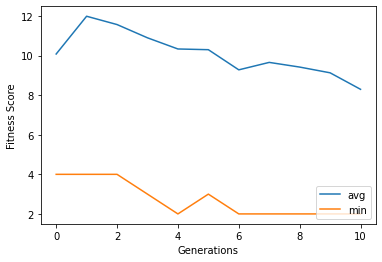

Genetic Algorithm model with population size of  500  and generation size of  50


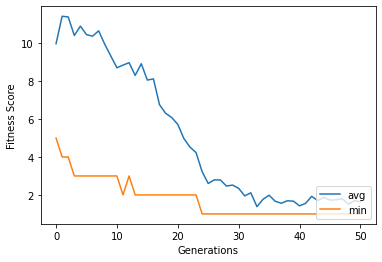

Genetic Algorithm model with population size of  500  and generation size of  100


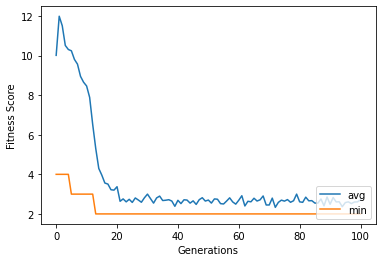

Genetic Algorithm model with population size of  100  and generation size of  10


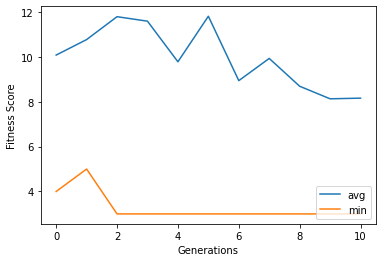

Genetic Algorithm model with population size of  100  and generation size of  50


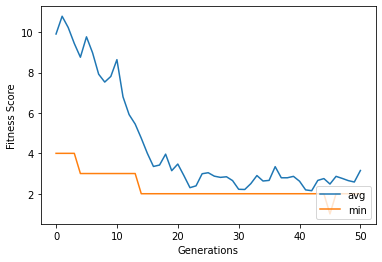

Genetic Algorithm model with population size of  100  and generation size of  100


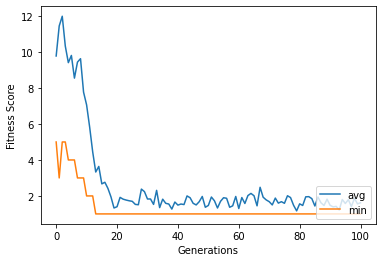

Genetic Algorithm model with population size of  2000  and generation size of  10


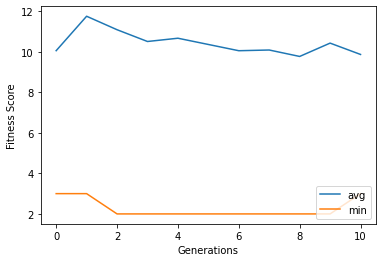

Genetic Algorithm model with population size of  2000  and generation size of  50


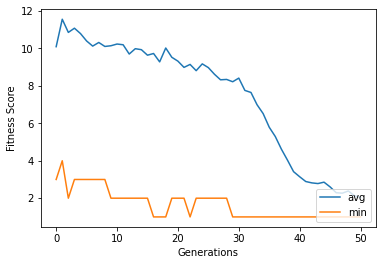

Genetic Algorithm model with population size of  2000  and generation size of  100


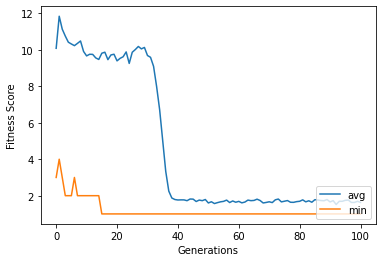

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline  

def plot(log, x, ngen):
  print("Genetic Algorithm model with population size of ", x, " and generation size of ", ngen)
  #gen, avg, min_, max_ = log.select("gen", "avg", "min", "max")
  gen, avg, min_, = log.select("gen", "avg", "min")

  plt.plot(gen, avg, label="avg")
  plt.plot(gen, min_, label="min")
  #plt.plot(gen, max_, label="max")
  plt.xlabel("Generations")
  plt.ylabel("Fitness Score")
  plt.legend(loc = "lower right")
  plt.show()

for result in results:
  plot(result[1], result[2], result[3])

### 5 pts:  Print out the best individual found and its fitness value.  Show the best individual as chessboard

In [ ]:
def bestIndivid(pop, x, ngen):
  print("Genetic Algorithm model with population size of ", x, " and generation size of ", ngen)

  best_ind = tools.selBest(pop, k=1)[0]

  print('Best individual is: ', best_ind)
  show_grid(best_ind)
  print('With fitness: ', toolbox.evaluate(best_ind))

for result in results:
  bestIndivid(result[0], result[2], result[3])

Genetic Algorithm model with population size of  500  and generation size of  10
Best individual is:  [39, 40, 17, 14, 51, 63, 29, 52]
-|-|-|-|-|-|-|-|
----------------
-|-|-|-|-|-|X|-|
----------------
-|X|-|-|-|-|-|-|
----------------
-|-|-|-|-|X|-|-|
----------------
-|-|-|-|-|-|-|X|
----------------
X|-|-|-|-|-|-|-|
----------------
-|-|-|X|X|-|-|-|
----------------
-|-|-|-|-|-|-|X|
----------------
With fitness:  [2]
Genetic Algorithm model with population size of  500  and generation size of  50
Best individual is:  [61, 15, 60, 18, 0, 30, 35, 41]
X|-|-|-|-|-|-|-|
----------------
-|-|-|-|-|-|-|X|
----------------
-|-|X|-|-|-|-|-|
----------------
-|-|-|-|-|-|X|-|
----------------
-|-|-|X|-|-|-|-|
----------------
-|X|-|-|-|-|-|-|
----------------
-|-|-|-|-|-|-|-|
----------------
-|-|-|-|X|X|-|-|
----------------
With fitness:  [1]
Genetic Algorithm model with population size of  500  and generation size of  100
Best individual is:  [32, 10, 6, 59, 12, 53, 23, 57]
-|-|-|-|-|-|X|

## Part II: Row-index-based board representation

In [ ]:
import random
import numpy as np
from deap import algorithms, base, creator, tools

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


Each row of the chess row is indexed from 0->7 . we place different queens on different rows initially.  The sequence [ a b c d .... ] means that in $0^{th}$ row, $a^{th}$ column, the queen is present and so on

In [ ]:
toolbox = base.Toolbox()

toolbox.register("attr_int", random.randint, 0, 7)
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_int, n=8)

In [ ]:
toolbox.individual()

[4, 6, 6, 2, 7, 5, 3, 2]

In [ ]:
def show_grid(board):
    
    n = [0]*64
    
    for i in range(len(board)):
        n[board[i] + i*8] = 1
      
    for i in range(8):
        for j in range(64):
            if j // 8 == i:
                if n[j] == 1:
                    print('X',end="|")
                else:
                    print('-',end="|")
        print()
        print("----------------")

In [ ]:
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [ ]:
pop = toolbox.population(n=5)

print(pop[0])

[3, 3, 3, 2, 2, 3, 3, 1]


In [ ]:
show_grid(pop[0])

-|-|-|X|-|-|-|-|
----------------
-|-|-|X|-|-|-|-|
----------------
-|-|-|X|-|-|-|-|
----------------
-|-|X|-|-|-|-|-|
----------------
-|-|X|-|-|-|-|-|
----------------
-|-|-|X|-|-|-|-|
----------------
-|-|-|X|-|-|-|-|
----------------
-|X|-|-|-|-|-|-|
----------------


### 10 pts:  Write your code in the cell below to define the "evaFitness" function, which return the fitness of any given board

- evaFitness() returns the total number of distinct pairs of queens that attack each other.  

- The following are some test cases you may use to verify the correctness of the evaFitness() function:

 * evaFitness([0, 2, 6, 7, 7, 4, 1, 6]) should return (4,)

 * evaFitness([7, 5, 2, 4, 3, 1, 3, 5]) should return (6,)

 * evaFitness([3, 1, 6, 0, 5, 7, 2, 1]) should return (5,)

 * evaFitness([7, 3, 1, 4, 5, 1, 3, 5]) should return (6,)



In [ ]:
#fitness function
def evaFitness(individual):
    conflict = 0
    for i in range(len(individual)):
        for j in range(i+1, len(individual)):
            if(individual[i] == individual[j]):
                conflict += 1
            if(abs(individual[i] - individual[j]) == abs(i-j)):
                conflict += 1
    return (conflict,)

### 5 pts:  Write your code in the cell below to register "evaluate" function to toolbox

In [ ]:
print(evaFitness([0, 2, 6, 7, 7, 4, 1, 6]))
print(evaFitness([7, 5, 2, 4, 3, 1, 3, 5]))
print(evaFitness([3, 1, 6, 0, 5, 7, 2, 1]))
print(evaFitness([7, 3, 1, 4, 5, 1, 3, 5]))

(4,)
(6,)
(5,)
(6,)


In [ ]:
toolbox.register("evaluate", evaFitness)

In [ ]:
toolbox.register("mate", tools.cxTwoPoint)

toolbox.register("mutate", tools.mutUniformInt, low = 0, up = 7, indpb=0.1)

toolbox.register("select", tools.selTournament, tournsize=3)

In [ ]:
stats = tools.Statistics(key=lambda ind: ind.fitness.values)

stats.register("avg", np.mean)
stats.register("min", np.min)

### 10 pts:  Write your code in the cell below to create the first generation, the hall of fame, and launch the genetic algorithm: eaSimple().   How many individuals you want to have for each generation and how many generations you want GA to go thourgh for each run?     Vary those two parameters to see the change. 

In [ ]:
def GenAlg(x, ngen):
    print("Genetic Algorithm model with population size of ", x, " and generation size of ", ngen)
    pop = toolbox.population(x)
    hof = tools.HallOfFame(maxsize = 1)
    pop, log = algorithms.eaSimple(pop, toolbox, cxpb = 0.7, mutpb = 0.2, ngen=ngen, stats=stats, halloffame=hof, verbose=True)
    return pop, log

xList = [500, 100, 2000]
nGenList = [10, 50, 100]

results = []
for x in xList:
    for ngen in nGenList:
        pop, log = GenAlg(x, ngen)
        results.append([pop, log, x, ngen])

Genetic Algorithm model with population size of  500  and generation size of  10
gen	nevals	avg  	min
0  	500   	7.738	2  
1  	378   	6.518	3  
2  	384   	5.788	2  
3  	377   	5.538	2  
4  	371   	5.336	2  
5  	389   	5.06 	2  
6  	373   	4.872	2  
7  	379   	4.764	2  
8  	384   	4.776	1  
9  	369   	4.674	1  
10 	369   	4.334	1  
Genetic Algorithm model with population size of  500  and generation size of  50
gen	nevals	avg  	min
0  	500   	7.758	2  
1  	401   	6.486	2  
2  	364   	5.734	1  
3  	372   	5.212	1  
4  	378   	4.888	1  
5  	388   	4.8  	0  
6  	386   	4.624	1  
7  	388   	4.576	1  
8  	373   	4.298	1  
9  	364   	4.046	1  
10 	381   	3.838	0  
11 	369   	3.482	0  
12 	370   	3.148	1  
13 	383   	2.828	1  
14 	381   	2.482	1  
15 	389   	2.026	1  
16 	398   	1.694	1  
17 	389   	1.376	1  
18 	397   	1.436	1  
19 	373   	1.258	1  
20 	345   	1.264	1  
21 	361   	1.394	1  
22 	371   	1.378	1  
23 	343   	1.29 	1  
24 	376   	1.348	1  
25 	369   	1.23 	1  
26 	374   	1.3  	1 

### 5 pts:  Plot the "avg" and "min" for each generation

Genetic Algorithm model with population size of  500  and generation size of  10


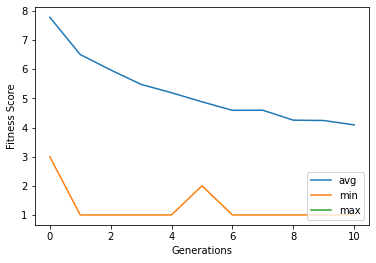

Genetic Algorithm model with population size of  500  and generation size of  50


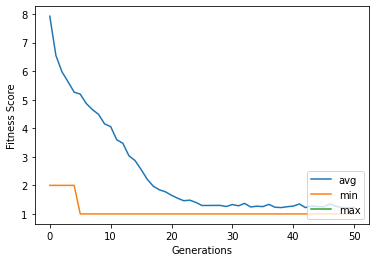

Genetic Algorithm model with population size of  500  and generation size of  100


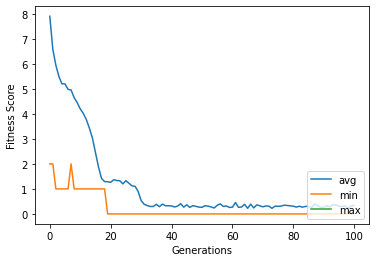

Genetic Algorithm model with population size of  100  and generation size of  10


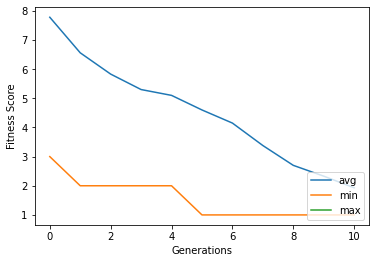

Genetic Algorithm model with population size of  100  and generation size of  50


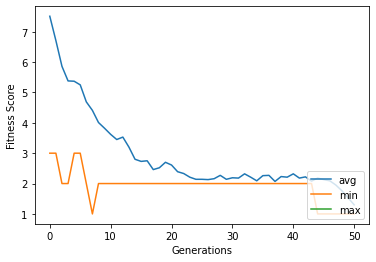

Genetic Algorithm model with population size of  100  and generation size of  100


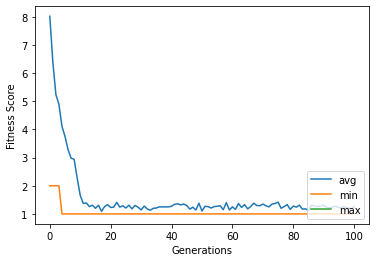

Genetic Algorithm model with population size of  2000  and generation size of  10


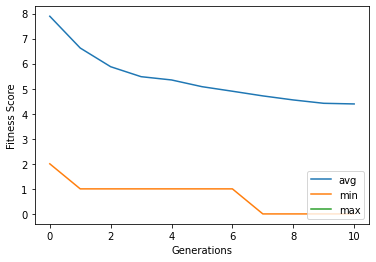

Genetic Algorithm model with population size of  2000  and generation size of  50


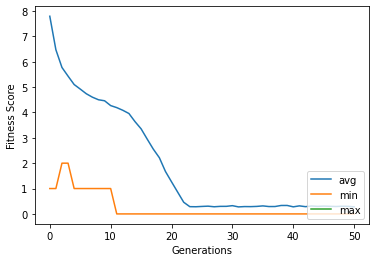

Genetic Algorithm model with population size of  2000  and generation size of  100


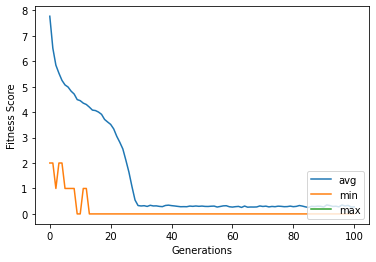

In [ ]:
# Plot the "avg" and "min" for each generation

import matplotlib.pyplot as plt
%matplotlib inline  

def plot(log, x, ngen):
  print("Genetic Algorithm model with population size of ", x, " and generation size of ", ngen)
  #gen, avg, min_, max_ = log.select("gen", "avg", "min", "max")
  gen, avg, min_, = log.select("gen", "avg", "min")

  plt.plot(gen, avg, label="avg")
  plt.plot(gen, min_, label="min")
  #plt.plot(gen, max_, label="max")
  plt.xlabel("Generations")
  plt.ylabel("Fitness Score")
  plt.legend(loc = "lower right")
  plt.show()

for result in results:
  plot(result[1], result[2], result[3])

### 5 pts:  Print out the best individual found and its fitness value.  Show the best individual as chessboard

In [ ]:
best_ind = tools.selBest(pop, k = 1)[0]

print("Best individual is: ", best_ind)
show_grid(best_ind)
print("Fitness: ", toolbox.evaluate(best_ind))

Best individual is:  [2, 0, 6, 4, 7, 1, 3, 5]
-|-|X|-|-|-|-|-|
----------------
X|-|-|-|-|-|-|-|
----------------
-|-|-|-|-|-|X|-|
----------------
-|-|-|-|X|-|-|-|
----------------
-|-|-|-|-|-|-|X|
----------------
-|X|-|-|-|-|-|-|
----------------
-|-|-|X|-|-|-|-|
----------------
-|-|-|-|-|X|-|-|
----------------
Fitness:  [0]


### Reflection:  Which board representaion is better in terms of ease of coding and final solution quality?   Try different parameter values for mutation and crossover and vary the number of generations and the population size.  Write your findings in the report.        